In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import json
import QHD.QHD_dataloader as DL
import QHD.QHD_basis as HDB
import QHD.QHD_encoder as HDE
import QHD.QHD_reg as QHDReg

In [2]:
D = 10000
EPOCH = 100
BITS = 3
STD = 0.

In [3]:
with open('current_matrix.json', 'r', encoding='utf8') as f:
  curr_matrices = json.load(f)

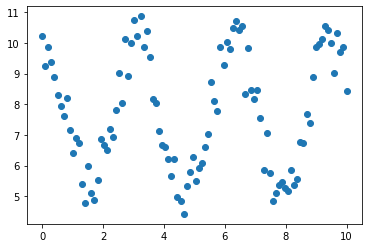

In [4]:
x = np.linspace(0, 10, 100)

func = lambda x: 10*np.cos(np.sin(x))

delta = np.random.uniform(-1, 1, x.size)
y = func(x) + delta


plt.scatter(x, y)
plt.show()

In [5]:
x = x.reshape((-1, 1))

In [6]:
hdb = HDB.HD_basis(D, 1)
basis = hdb.getBasis()
hde = HDE.HD_encoder(basis)
xencoded = hde.encodeData(x)

Generating vanilla HD basis of shape... 

vectors:   0%|          | 0/10000 [00:00<?, ?it/s]

(10000, 1)
Encoding time: 0.1294879913330078 
Encoding data of shape (100, 1)


samples encoded:   0%|          | 0/100 [00:00<?, ?it/s]

Time spent: 0 sec


5.361682830548987
0.3870550275969908
0.41935427209448034
0.3858045248105675
0.39625288929424457
0.4068482190562836
0.37029718436782794
0.4100261337447999
0.3811510732093688
0.39355718822345087
0.3912972053763742
0.3562508481942161
0.38322669699760703
0.37177514724485133
0.3854650124220391
0.3733060345244663
0.3954414741608193
0.3725623692880686
0.37029258031769907
0.3876681785056889
0.3840086880561488
0.38887817337612723
0.38259448289794923
0.37467723304873013
0.37833008679518415
0.37187251612878586
0.3578802395170379
0.40710797165396057
0.3680716609616598
0.39431994615485294
0.38920180216832184
0.39115573566967676
0.40146701687689434
0.36092226582821935
0.36261243369544055
0.40635852443363535
0.34121070430828276
0.39318247300314263
0.3790264688341967
0.39368188973500495
0.4028295163824486
0.38120727516988856
0.3927243512207951
0.37536534246882075
0.3355225156264804
0.3934656140483826
0.39332379077733526
0.3746284712345197
0.39437889137169213
0.3865244368114123
0.35202751333998966
0.38

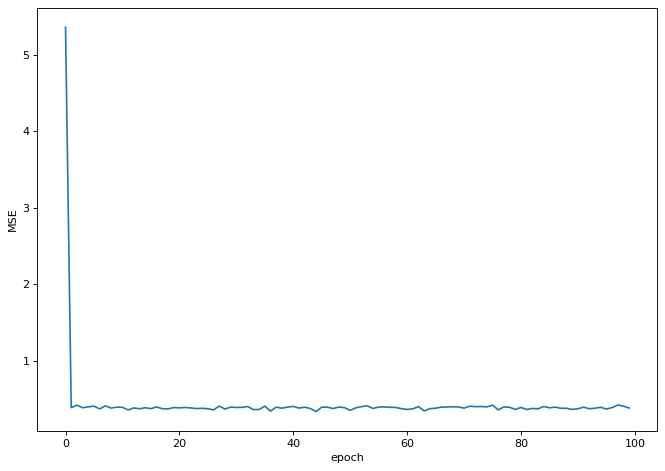

In [7]:
model = QHDReg.QHD_reg(D, -1)

history = []

for epoch in range(EPOCH):
  train_mse = model.itr_train(xencoded, y, lr=0.0001)
  model.model_projection()

  print(train_mse)
  history.append(train_mse)

plt.figure(figsize=(10, 7), dpi=80)
plt.plot(history)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

63.558770534778844
18454391877.87847
13918233333.48473
13904325419.850018
13934278156.828224
13932188705.297358
13934248362.57989
13930766562.771843
13932397063.99015
13931513047.464163
13928551840.826841
13930043594.493095
13925673460.861477
13928481130.262905
13927591272.612217
13924389382.483032
13924829580.49109
13924752620.597559
13924428310.255478
13924411699.158955
13924262783.676529
13925716686.96025
13925716686.960255
13924853853.52344
13924853853.52343
13924853853.523438
13923431483.262375
13924183782.969955
13924890030.552217
13925527906.70409
13925527906.70409
13925527906.704096
13925527906.7041
13924815824.408195
13924815824.408197
13924815824.408194
13925409297.97413
13924546492.19732
13924546492.197319
13924546492.197311
13924546492.197319
13924546492.19732
13924546492.197319
13924546492.197315
13923759629.416746
13924486404.10109
13924486404.10109
13925188116.869095
13925188116.869097
13925188116.869091
13925188116.869097
13925188116.869099
13924303124.04944
13924303124

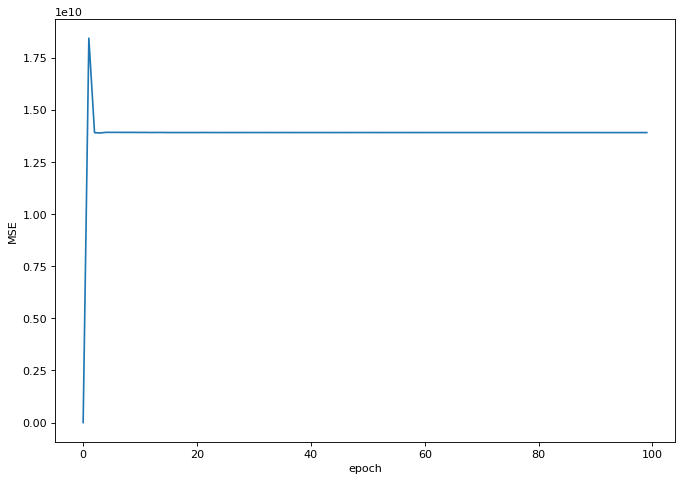

In [8]:
model = QHDReg.QHD_reg(D, BITS)

history = []

for epoch in range(EPOCH):
  train_mse = model.itr_train(xencoded, y, lr=1000000)
  model.model_projection()

  print(train_mse)
  history.append(train_mse)

plt.figure(figsize=(10, 7), dpi=80)
plt.plot(history)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()

781577609.5739192
504381116.94754195
504161495.888458
504225998.14599335
504103788.0554671
504231860.7319886
503959035.1668214
503922609.5095222
503796858.834317
503775924.7511117
503853035.3927443
503978447.35569364
504021361.3245169
504001402.4075481
503929687.5778171
503961740.17622405
503950553.1195433
503949918.04543024
503948154.39341515
503913791.95201945
503877930.666015
503893047.53475547
503939760.8693065
504003821.8205079
504036231.2790678
503986274.3466277
504016591.2150334
503997928.0090155
504013517.6713461
503980654.18753594
503964010.5003512
503947368.43266547
503978095.5911187
503928421.3953198
503943835.8294977
503941365.5665966
503941365.5665964
504004512.4455299
504004512.4455301
503970857.3409821
503953417.89588135
503935814.4144131
503935814.41441315
503935814.41441286
503918996.7612073
503918996.76120734
503901395.2946725
503867807.6758294
503867807.6758293
503867807.6758297
503867807.6758295
503867807.67582965
503834050.45968974
503834050.45968986
503817841.6613

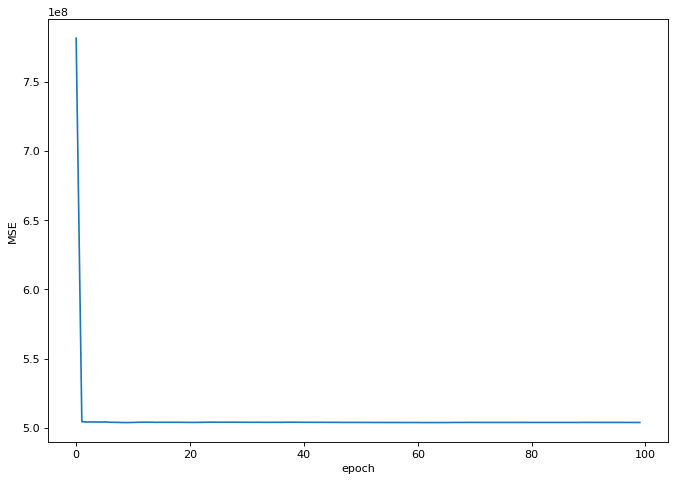

In [9]:
model = QHDReg.QHD_reg(D, BITS)

history = []

for epoch in range(EPOCH):
  train_mse = model.itr_train(xencoded, y, std=STD, mapping=curr_matrices[f'{BITS}'])
  model.model_projection()

  print(train_mse)
  history.append(train_mse)

plt.figure(figsize=(10, 7), dpi=80)
plt.plot(history)
plt.xlabel('epoch')
plt.ylabel('MSE')
plt.show()